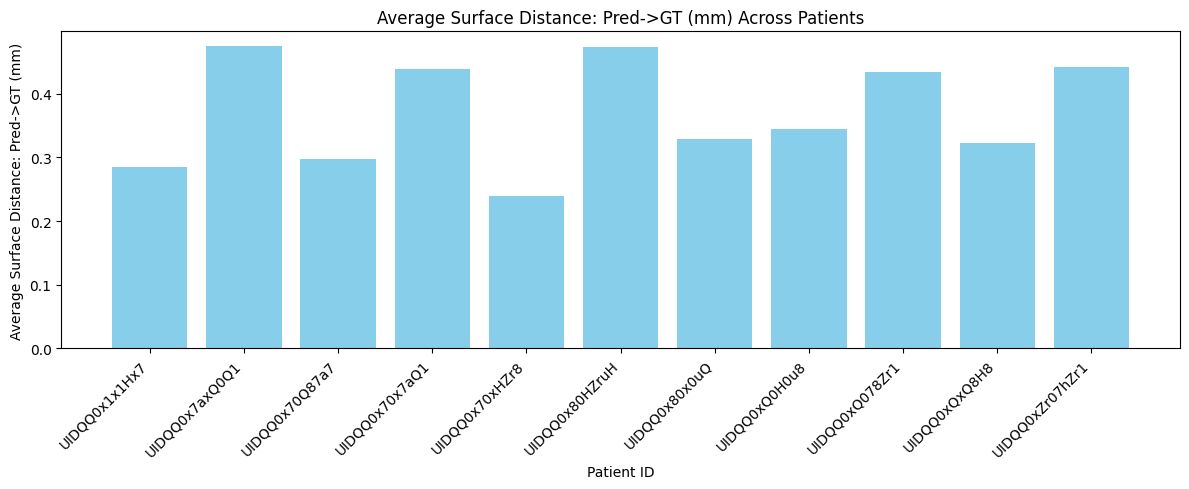

In [27]:
#bar chart
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")  # change path if needed

# Choose the metric you want to plot
metric = 'Average Surface Distance: Pred->GT (mm)'
# Examples of other metrics you can switch to:
# metric = 'Robust Hausdorff (95%) (mm)'
# metric = 'Surface Dice at 1mm'
# metric = 'Surface Overlap at 1mm (GT)'

plt.figure(figsize=(12, 5))
plt.bar(df['Patient ID'], df[metric], color = 'skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel(metric)
plt.xlabel('Patient ID')
plt.title(f'{metric} Across Patients')
plt.tight_layout()
plt.show()


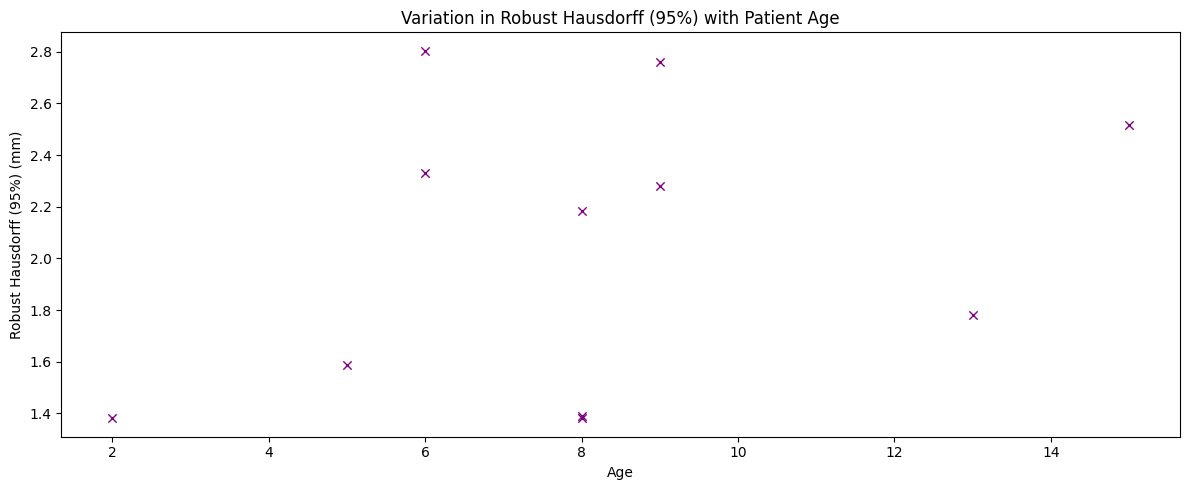

In [46]:
#scatter plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")  # change path if needed

# Choose the metric you want to plot
age = 'Age'
#metric = 'Average Surface Distance: Pred->GT (mm)'
# Examples of other metrics you can switch to:
metric = 'Robust Hausdorff (95%) (mm)'
# metric = 'Surface Dice at 1mm'
#metric = 'Surface Overlap at 1mm (Pred)'

plt.figure(figsize=(12, 5))
plt.scatter(df[age], df[metric], color = 'purple', marker='x', linewidth=1)
plt.ylabel(metric)
plt.xlabel(age)
plt.title(f'Variation in Robust Hausdorff (95%) with Patient Age')
plt.tight_layout()
plt.show()


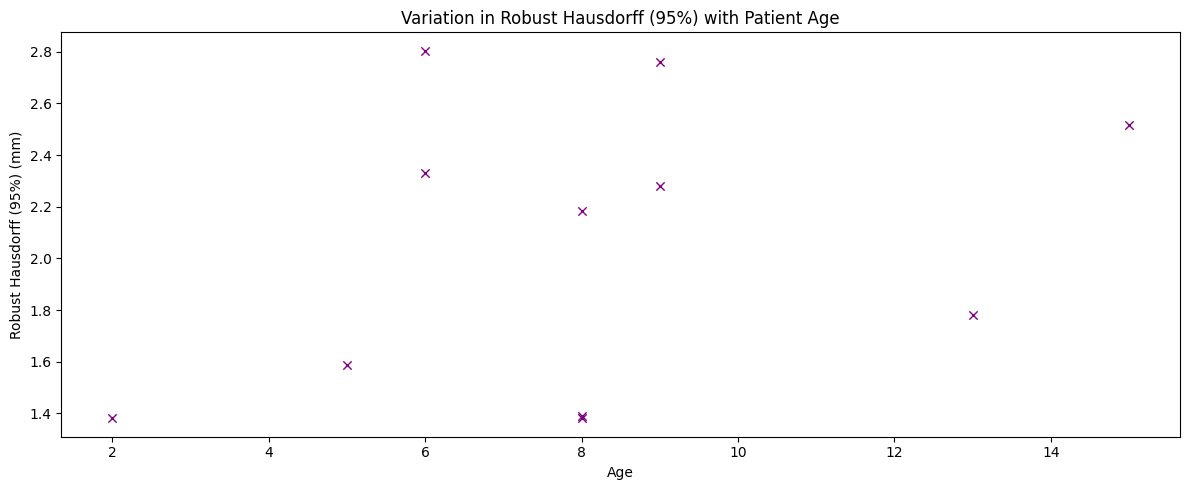

Detected outliers:
Empty DataFrame
Columns: [Patient ID, Age, Robust Hausdorff (95%) (mm)]
Index: []


In [47]:
#circle outliers
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

age = 'Age'
metric = 'Robust Hausdorff (95%) (mm)'
id_col = 'Patient ID'  

Q1 = df[metric].quantile(0.25)
Q3 = df[metric].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]
df_no_outliers = df[(df[metric] >= lower_bound) & (df[metric] <= upper_bound)]

plt.figure(figsize=(12, 5))
plt.scatter(df[age], df[metric], color='purple', marker='x', linewidth=1)

for _, row in outliers.iterrows():
    plt.scatter(row[age], row[metric], facecolors='none', edgecolors='blue', s=200, linewidth=2)
    plt.text(row[age] + 0.1, row[metric], f"{row[id_col]}", fontsize=9, color='blue')

plt.ylabel(metric)
plt.xlabel(age)
plt.title('Variation in Robust Hausdorff (95%) with Patient Age')
plt.tight_layout()
plt.show()

print("Detected outliers:")
print(outliers[[id_col, age, metric]])


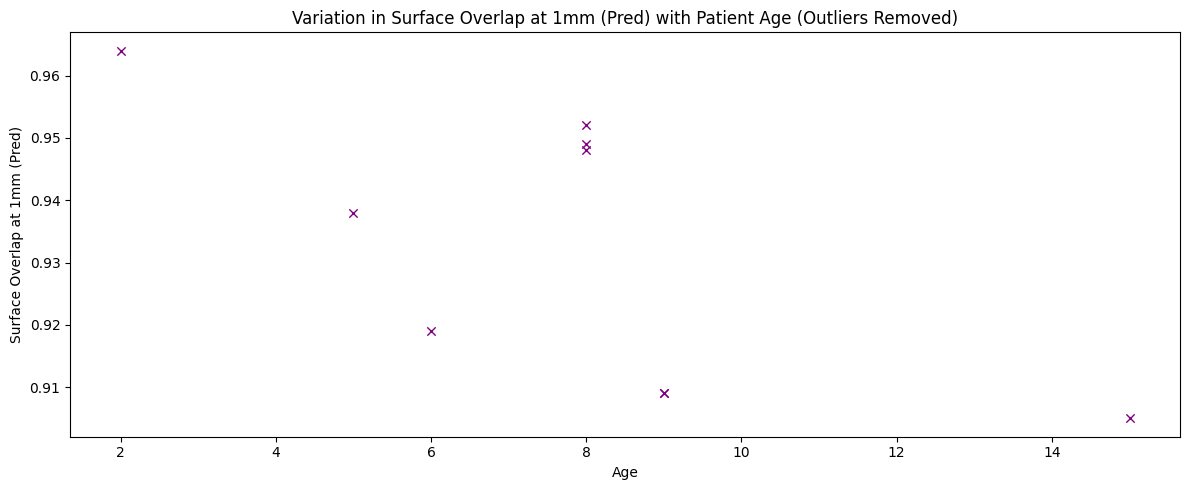

Excluded outliers:
       Patient ID  Age  Surface Overlap at 1mm (Pred)
7   UIDQQ0xQ0H0u8   13                          0.818
8  UIDQQ0xQ078Zr1    6                          0.731


In [43]:
#plot without outliers
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

age = 'Age'
metric = 'Surface Overlap at 1mm (Pred)'
id_col = 'Patient ID'

# --- Detect outliers using IQR ---
Q1 = df[metric].quantile(0.25)
Q3 = df[metric].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]

df_no_outliers = df[(df[metric] >= lower_bound) & (df[metric] <= upper_bound)]

plt.figure(figsize=(12, 5))
plt.scatter(df_no_outliers[age], df_no_outliers[metric], color='purple', marker='x', linewidth=1)

plt.ylabel(metric)
plt.xlabel(age)
plt.title('Variation in Surface Overlap at 1mm (Pred) with Patient Age (Outliers Removed)')
plt.tight_layout()
plt.show()

print("Excluded outliers:")
print(outliers[[id_col, age, metric]])


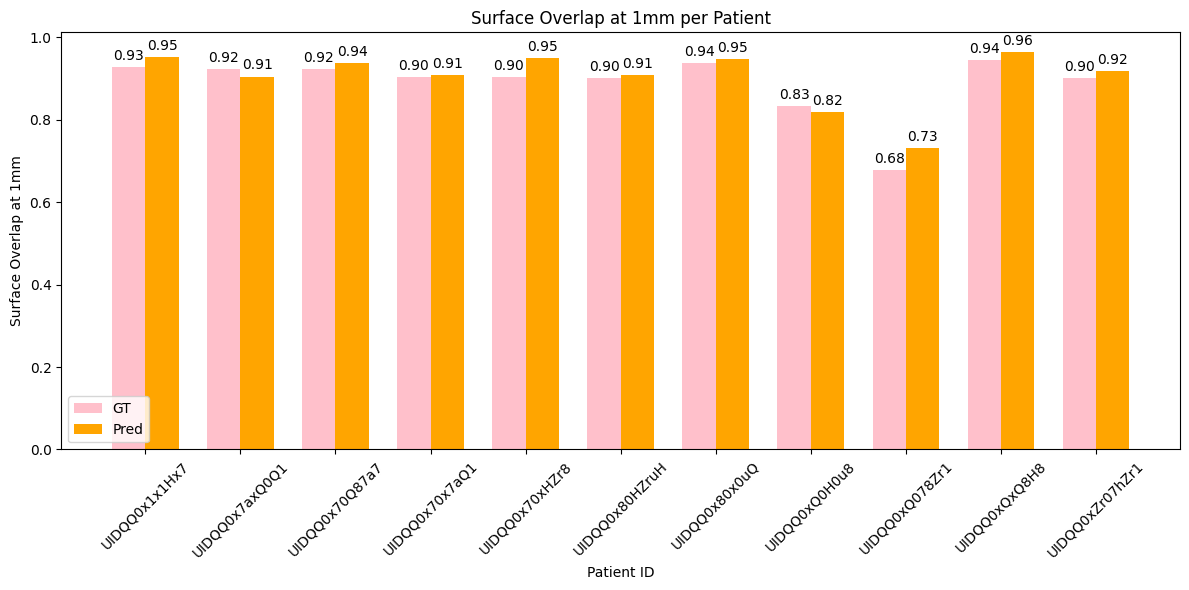

In [44]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

# Extract data
patients = df['Patient ID']
asd_gt_to_pred = df['Surface Overlap at 1mm (GT)']
asd_pred_to_gt = df['Surface Overlap at 1mm (Pred)']

# X-axis positions
x = np.arange(len(patients))
width = 0.35  # bar width

# Plot
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, asd_gt_to_pred, width, label='GT', color='pink')
rects2 = ax.bar(x + width/2, asd_pred_to_gt, width, label='Pred', color='orange')

# Labels and title
ax.set_ylabel('Surface Overlap at 1mm')
ax.set_xlabel('Patient ID')
ax.set_title('Surface Overlap at 1mm per Patient')
ax.set_xticks(x)
ax.set_xticklabels(patients, rotation=45)
ax.legend()

# Optional: add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


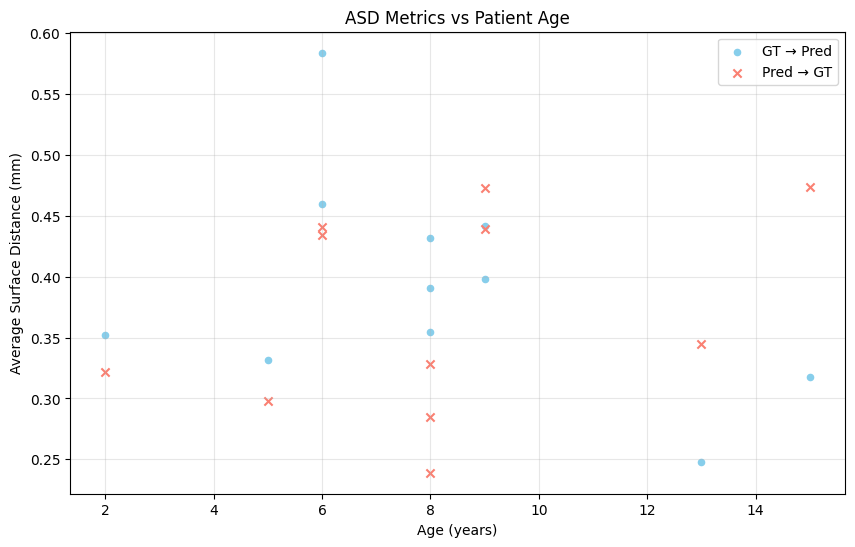

In [40]:
import matplotlib.pyplot as plt

ages = df['Age']

plt.figure(figsize=(10,6))
plt.scatter(ages, asd_gt_to_pred, color='skyblue', label='GT → Pred', marker='o', s=20)
plt.scatter(ages, asd_pred_to_gt, color='salmon', label='Pred → GT', marker='x', s=35)

plt.xlabel('Age (years)')
plt.ylabel('Average Surface Distance (mm)')
plt.title('ASD Metrics vs Patient Age')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [52]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Abigail Crowther\OneDrive - The University of Manchester\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")
numeric_cols = df.select_dtypes(include='number').columns

means = df.groupby('Gender')[numeric_cols].mean()
sems = df.groupby('Gender')[numeric_cols].sem()

# Create formatted table: "mean ± sem"
formatted = means.copy().astype(str)
for col in numeric_cols:
    formatted[col] = means[col].round(4).astype(str) + " ± " + sems[col].round(4).astype(str)

formatted

,Age,Average Surface Distance: GT->Pred (mm),Average Surface Distance: Pred->GT (mm),Robust Hausdorff (100%) (mm),Robust Hausdorff (95%) (mm),Surface Overlap at 1mm (GT),Surface Overlap at 1mm (Pred),Surface Dice at 1mm
Gender,,,,,,,,
Female,6.4286 ± 0.9476,0.4286 ± 0.0314,0.3846 ± 0.03,8.7039 ± 1.9671,2.075 ± 0.2347,0.8829 ± 0.0349,0.9031 ± 0.0298,0.8929 ± 0.0324
Male,11.0 ± 1.7795,0.328 ± 0.0305,0.3465 ± 0.0484,7.3078 ± 0.621,1.9682 ± 0.244,0.8992 ± 0.0232,0.905 ± 0.0308,0.9022 ± 0.0261
